# Data Manipulation with Pandas

![Pandas](https://pandas.pydata.org/_static/pandas_logo.png)

Pandas is a very powerful Python library in data manipulation and analysis. It has the following features

- Powerful indexing,
- Missing / NA data handling,
- group by and joining,
- time series manipulations etc

# Series
`Series` is a 1-D array. But it is much powerful than python native array. Now let's import `pandas` and play around Series. 

In [2]:
import pandas as pd

To create a series from python array, we call `pd.Series` and put array as the first parameter.

In [3]:
prices = pd.Series([30, 120, 200, 200])
prices

0     30
1    120
2    200
3    200
dtype: int64

Now, we have a series of 4 elements.

Filtering elements are easy, let's try the following.

In [4]:
print(True and False)
prices[(prices < 50) & (prices > 100)]

False


Series([], dtype: int64)

In [5]:
prices > 50

0    False
1     True
2     True
3     True
dtype: bool

In [6]:
prices[[True, True, True, True]]

0     30
1    120
2    200
3    200
dtype: int64

In [7]:
prices.size

4

In [8]:
prices[prices > 50].index

Int64Index([1, 2, 3], dtype='int64')

In [9]:
prices[0:2]

0     30
1    120
dtype: int64

In [10]:
l = [1, 2, 3, 4]
print(type(l))
print(type(prices))
print(l[0:2])
print(prices[0:2])

<class 'list'>
<class 'pandas.core.series.Series'>
[1, 2]
0     30
1    120
dtype: int64


# Simple Statistics
We always need to check the statistics of a number array. `pandas` provides many. 

In [11]:
prices.describe()

count      4.000000
mean     137.500000
std       80.983537
min       30.000000
25%       97.500000
50%      160.000000
75%      200.000000
max      200.000000
dtype: float64

In [12]:
prices.unique()

array([ 30, 120, 200])

In [13]:
prices.max()

200

In [14]:
prices.min()

30

In [15]:
prices.plot()

In [16]:
a = pd.Series([1, 2, 3, 4])
b = pd.Series([2, 3, 4, 6])
a - b

0   -1
1   -1
2   -1
3   -2
dtype: int64

# Index
By default, a `pandas` series is from 0..N - 1. But we may want to have some other indices.

In [17]:
choices = pd.Series(['Ann', 'Bonnie', 'Claire', 'Dice', 'Egg'],
                    index=['A', 'B', 'C','D','E'])
choices

A       Ann
B    Bonnie
C    Claire
D      Dice
E       Egg
dtype: object

In [18]:
choices.loc[['B', 'D', 'E']]

B    Bonnie
D      Dice
E       Egg
dtype: object

In [19]:
choices.iloc[[1, 3, 4]]

B    Bonnie
D      Dice
E       Egg
dtype: object

In [20]:
choices.describe()

count          5
unique         5
top       Claire
freq           1
dtype: object

But character index is not always something we want, now let see if we can use `datetime` as index.

In [21]:
from datetime import datetime, timedelta
start_date = datetime(2018, 4, 1, 0, 0, 0)
dates = [start_date]
for i in range(1, 5):
    d = start_date + timedelta(days=i)
    dates.append(d)
dates

[datetime.datetime(2018, 4, 1, 0, 0),
 datetime.datetime(2018, 4, 2, 0, 0),
 datetime.datetime(2018, 4, 3, 0, 0),
 datetime.datetime(2018, 4, 4, 0, 0),
 datetime.datetime(2018, 4, 5, 0, 0)]

2018-04-01    1.0
2018-04-02    2.0
2018-04-03    3.0
2018-04-04    6.0
2018-04-05    8.0
dtype: float64

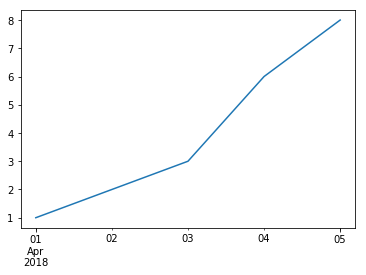

In [22]:
values = pd.Series([1.0, 2.0, 3.0, 6.0, 8.0], index=dates)
values.plot()
values

In [23]:
values.resample('3d').head()

/Users/howawong/Documents/workspace/python-for-students/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


2018-04-01    2.0
2018-04-04    7.0
dtype: float64

In [24]:
values2 = values.resample('48h').head()
values2.head(n=100)

/Users/howawong/Documents/workspace/python-for-students/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


2018-04-01    1.5
2018-04-03    4.5
2018-04-05    8.0
Freq: 48H, dtype: float64

So many NaN right, because we just upsampled the series and we need to do extra work to fill in the gaps.

2018-04-01 00:00:00    1.00
2018-04-01 06:00:00    1.25
2018-04-01 12:00:00    1.50
2018-04-01 18:00:00    1.75
2018-04-02 00:00:00    2.00
Freq: 6H, dtype: float64


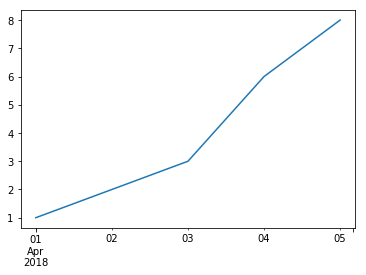

In [25]:
values2 = values.resample(rule='6H')
values2 = values2.interpolate()
print(values2.head())
values2.plot()

# Data Frame
A data frame is just like a 2D table, which consist of multiple columns. To create a data frame,

In [26]:
genders = ['M', 'F', 'M', 'M', 'F']
names = ['Tom', 'Ann', 'John', 'Peter', 'Ella']
depts = ['CS', 'Art', 'CS', 'Phy', 'CS']
student_ids = ['A1001','A1002','A1005','A1006', 'A1008']
students = pd.DataFrame(data={'gender': genders, 
                              'names': names, 
                              'dept': depts}, 
                        index=student_ids)
students

,dept,gender,names
A1001,CS,M,Tom
A1002,Art,F,Ann
A1005,CS,M,John
A1006,Phy,M,Peter
A1008,CS,F,Ella


Now we can query the dataframe via checking column values, for example

In [27]:
students[students['gender'] == 'M']

,dept,gender,names
A1001,CS,M,Tom
A1005,CS,M,John
A1006,Phy,M,Peter


In [28]:
students[(students['gender'] == 'M') & (students['dept'] == 'CS')]

,dept,gender,names
A1001,CS,M,Tom
A1005,CS,M,John


In [29]:
students.iloc[-3:]

,dept,gender,names
A1005,CS,M,John
A1006,Phy,M,Peter
A1008,CS,F,Ella


You can also select few particular columns

In [30]:
students["dept"].unique()

array(['CS', 'Art', 'Phy'], dtype=object)

# Group By & Aggregation
When writing SQL, it is common to do aggreation via `group by` and aggregation function such as `distinct`, `sum` or `avg`. In python `pandas`, there is also `groupby` and `agg` to process data frame.

In [31]:
dept_group_by = students.groupby("dept")["names"].agg(
    {"names":"count"})
df_temp = dept_group_by.reset_index('dept')
df_temp = df_temp.rename(columns = {'names': 'total'})
df_temp

/Users/howawong/Documents/workspace/python-for-students/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,dept,total
0,Art,1
1,CS,3
2,Phy,1


And similarly, we can group a data frame by a key and calculate the sums.

In [32]:
coins = pd.DataFrame({'values': [2, 4, 6, 8, 19], 
                      'owner': ['A', 'B', 'A', 'B', 'A']})
coins_by_owner = coins.groupby('owner').agg('sum')
coins_by_owner = coins_by_owner.reset_index()
coins_by_owner

,owner,values
0,A,27
1,B,12


# Sorting

Sorting can be done easily via `sort_values` function.

In [33]:
sorted_students = students.sort_values(by=['dept', 'gender'], ascending=[False, True])
sorted_students

,dept,gender,names
A1006,Phy,M,Peter
A1008,CS,F,Ella
A1001,CS,M,Tom
A1005,CS,M,John
A1002,Art,F,Ann


# Merging and Joining Data Frame

Sometimes we need to combine two data frames into one data frame for data manipulation. Pandas provides a simple way to combine data via key and join method. Suppose now we have an `students_info` data frame and want to combine with the `students` data frame.

In [34]:
ages = [11, 12, 13, 14, 15]
students_info = pd.DataFrame(data={'age': ages}, index=student_ids)
students_info

,age
A1001,11
A1002,12
A1005,13
A1006,14
A1008,15


By using `join` function, we can put two data frames together.

In [35]:
merged_df = students.join(students_info)
merged_df

,dept,gender,names,age
A1001,CS,M,Tom,11
A1002,Art,F,Ann,12
A1005,CS,M,John,13
A1006,Phy,M,Peter,14
A1008,CS,F,Ella,15


In [36]:
age_group_by = merged_df.groupby('dept')['age'].agg('mean')
age_group_by

dept
Art    12
CS     13
Phy    14
Name: age, dtype: int64

Since `students` and `students_info` share the identical indices, the joining is painless. There is also a similar function called `merge` if we want to merge two data frames by column values.

In [37]:
import numpy as np
depts2 = ['CS', 'Chem', np.nan]
names = ['Ann', 'Tom', 'Susan']
df1 = pd.DataFrame(data={'name': names, 'dept': depts2})
#print(df1)
df2 = pd.DataFrame(data={'dept': ['CS', 'Chem', np.nan], 'years': [3, 4, 99]})
#print(df2)
df1.merge(df2, on='dept', how='inner')

,dept,name,years
0,CS,Ann,3
1,Chem,Tom,4
2,NaN,Susan,99


# Data Frame I/O from CSV file

To read/write between CSV and pandas data frame is simple, we have `read_csv` and `to_csv` function.

## Reading a CSV
Reading a CSV via `read_csv`

In [38]:
appl_df = pd.read_csv('aapl.csv')
print(appl_df.shape)
appl_df.head()

(6081, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


## Writing a  CSV
We can write a data frame to CSV file via `to_csv`.

,Date,Open,High,Low,Close,Volume,Adj Close
6054,1984-10-15,24.00,24.25,24.00,24.00,8715200,2.74
6055,1984-10-12,23.75,23.87,22.50,22.75,9522400,2.60
6056,1984-10-11,23.87,24.50,23.75,23.75,6553600,2.71
6057,1984-10-10,24.62,24.62,23.87,23.87,13070400,2.72
6058,1984-10-09,24.87,25.00,24.62,24.62,4515200,2.81


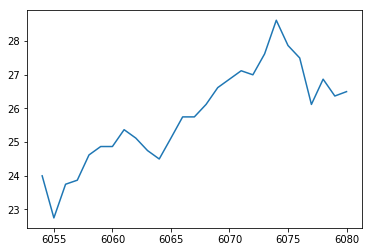

In [39]:
appl_df_2 = appl_df[appl_df['Date'] <= '1984-10-15']
appl_df_2.to_csv('appl2.csv', index=False)
appl_df_2['Close'].plot()
appl_df_2.head()

# Adding Column
You may need to process some columns to a new column or replace the original columns. For example,

In [40]:
appl_df['Date2'] = pd.to_datetime(appl_df['Date'], format='%Y-%m-%d')
appl_df3 = appl_df.copy()
appl_df3.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Date2
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,2008-10-14
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,2008-10-13
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,2008-10-10
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,2008-10-09
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,2008-10-08


`apply` is another function generate a column from existing columns.

In [41]:
appl_df3['Month'] = appl_df3['Date2'].apply(lambda x: x.month)
appl_df3['Year'] = appl_df3['Date2'].apply(lambda x: x.year)
appl_df3.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Date2,Month,Year
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,2008-10-14,10,2008
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,2008-10-13,10,2008
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,2008-10-10,10,2008
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,2008-10-09,10,2008
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,2008-10-08,10,2008


/Users/howawong/Documents/workspace/python-for-students/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  
/Users/howawong/Documents/workspace/python-for-students/env/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


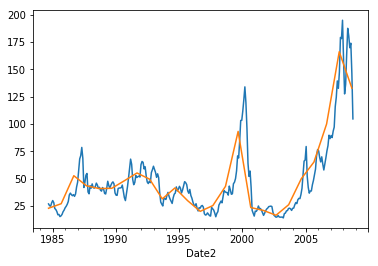

In [42]:
appl_df4 = appl_df3.set_index('Date2')
appl_df4['High'].resample('30d').plot()
appl_df4['High'].resample('365d').plot()

# Filling and Dropping Missing Value

In data cleansing, there are always invalid or not a number in data set. We may need to fill it or drop it.

## Dropping

0    1.0
2    2.0
4    3.0
dtype: float64

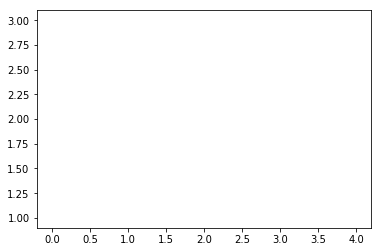

In [43]:
values = pd.Series([1.0, np.nan, 2.0, np.nan, 3.0, np.nan])
values.plot()
values.dropna().size
values.dropna().head()

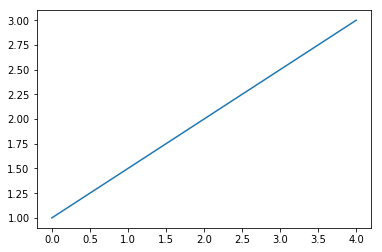

In [44]:
values.dropna().plot()

# Filling

0    1.0
1    1.0
2    2.0
3    2.0
4    3.0
5    3.0
dtype: float64

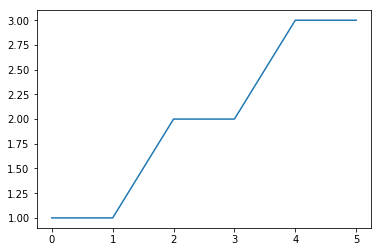

In [45]:
values.fillna(method='pad').plot()
values.fillna(method='pad')

0    1.0
1    NaN
2    2.0
3    NaN
4    3.0
5    NaN
dtype: float64
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
dtype: float64


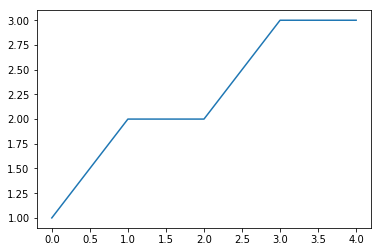

In [46]:
values.fillna(method='bfill').plot()
print(values)
print(values.fillna(values.mean()))